Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[-2.8  0.   0.   0. ]
 [ 0.   1.   0.   0. ]
 [ 0.   0.   1.   0. ]
 [ 0.   0.   0.   0.8]]


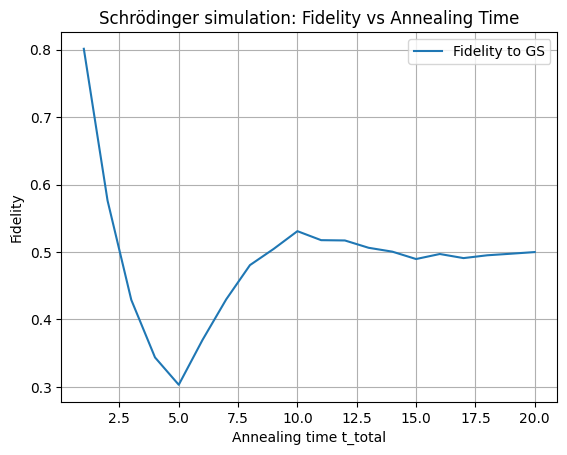

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, tensor, sigmax, sigmaz, mesolve, qeye,fidelity

# ------------------ Schrödinger Simulation ------------------

def hamiltonian_Ising(s, J=1.0, h=0.9):
    Hx = - ((sigmax() & qeye(2)) + (qeye(2) & sigmax()))
    Hz = - J * (sigmaz() & sigmaz()) - h * ((sigmaz() & qeye(2)) + (qeye(2) & sigmaz()))
    return (1 - s) * Hx + s * Hz

def annealing_schedule(t, t_total):
    return t / t_total

def simulate_schrodinger(t_total, steps=1000):
    times = np.linspace(0, t_total, steps)
    psi0 = tensor(basis(2, 0), basis(2, 0))  # |00>

    def H_t(t, args):
        s = annealing_schedule(t, t_total)
        return hamiltonian_Ising(s)

    result = mesolve(H_t, psi0, times, [], [])
    return result, times

def gs_state_final():
    Hf = hamiltonian_Ising(1.0)
    print(Hf)
    eigvals, eigvecs = Hf.eigenstates()
    return eigvecs[0]  # Ground state

def compute_fidelity(final_state, target_state):
    return np.abs((target_state.dag() * final_state))**2

# ------------------ Run and Plot ------------------
t_total_list = np.linspace(1, 20, 20)
fidelities = []
gs_target = gs_state_final()

for t_total in t_total_list:
    result, _ = simulate_schrodinger(t_total)
    psi_final = result.states[-1]
    f = fidelity(psi_final, gs_target)
    fidelities.append(f)

plt.plot(t_total_list, fidelities, label="Fidelity to GS")
plt.xlabel("Annealing time t_total")
plt.ylabel("Fidelity")
plt.title("Schrödinger simulation: Fidelity vs Annealing Time")
plt.grid()
plt.legend()
plt.show()
